In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from collections import deque
%matplotlib inline

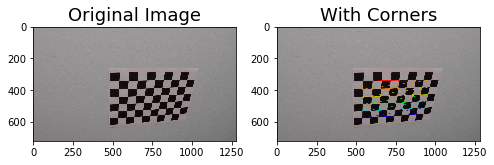

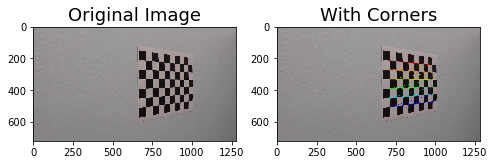

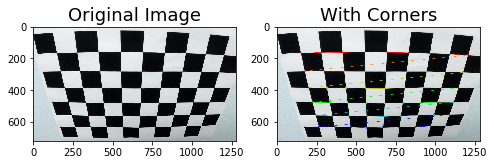

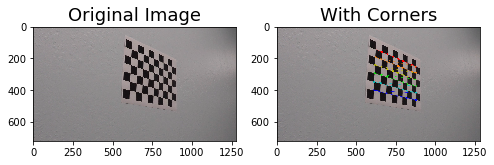

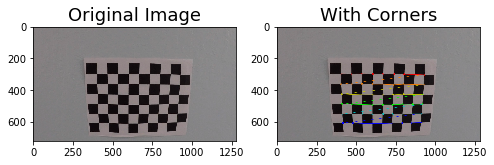

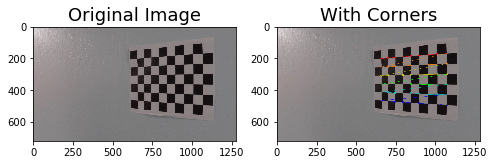

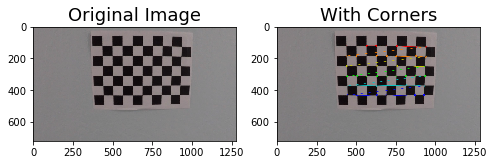

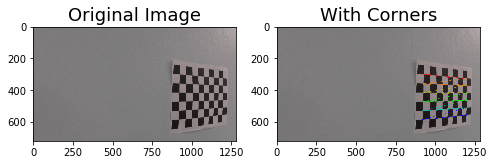

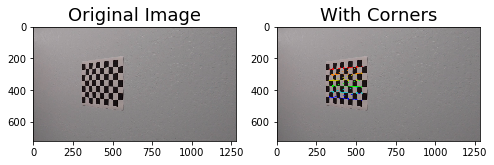

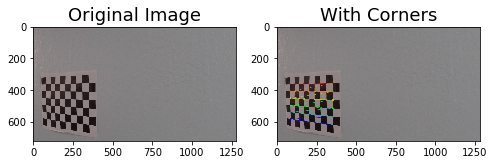

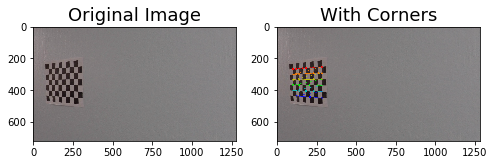

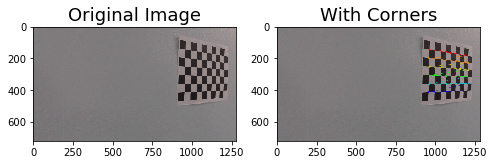

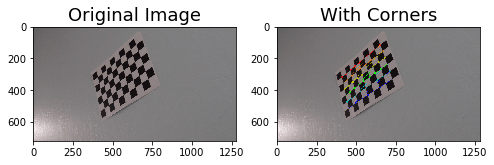

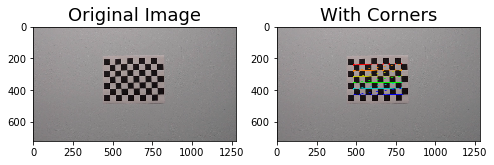

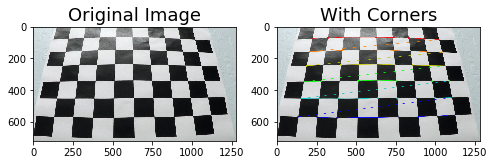

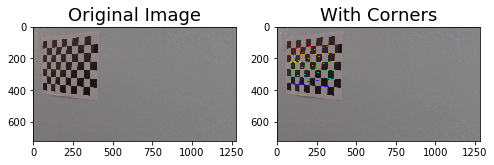

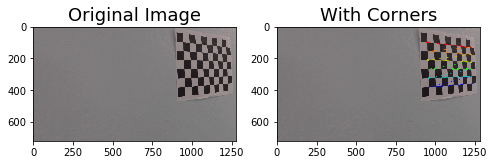

In [2]:
import glob

images =glob.glob('camera_cal/calibration*.jpg')
objpoints = [] #3D points in real world space
imgpoints = [] #2D points in image plane

objp = np.zeros((9*6,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x, y coordinates

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        cv2.drawChessboardCorners(img,(9,6),corners,ret)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
        ax1.imshow(cv2.cvtColor(mpimg.imread(fname), cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image', fontsize=18)
        ax2.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax2.set_title('With Corners', fontsize=18)
    #  cv2.imshow('img',img)
      #  cv2.waitKey(500)
      #  cv2.destroyAllWindows()

In [3]:
def undistort(img,show=True,read=True):
    if read:
        img = cv2.imread(image)
        img_size = (img.shape[1],img.shape[0])
        ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)
        undist = cv2.undistort(img,mtx,dist,None,mtx)
    if show:
        f, (ax1,ax2) = plt.subplots(1, 2, figsize=(9,6))
        ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image',fontsize=20)
        ax2.imshow(cv2.cvtColor(undist,cv2.COLOR_BGR2RGB))
        ax2.set_title('Undistorted Image',fontsize=20)
    else:
        return undist

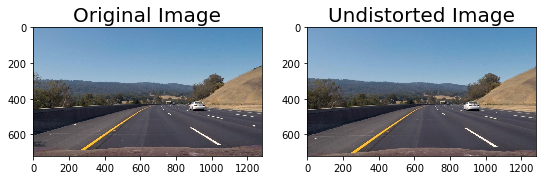

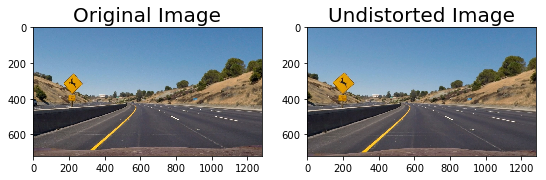

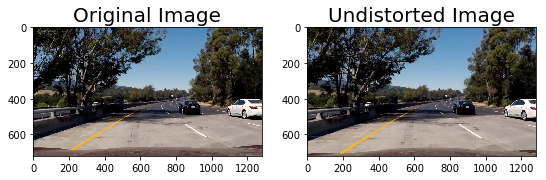

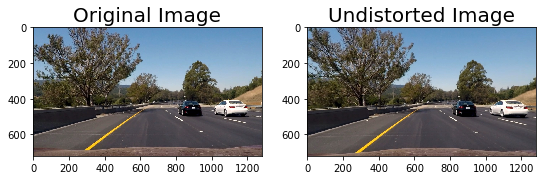

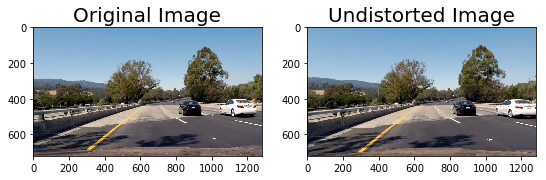

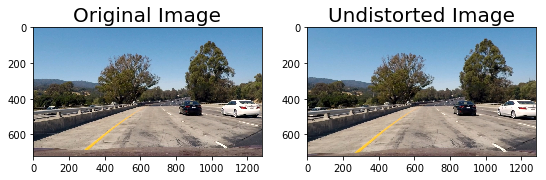

In [4]:
images = glob.glob('test_images/test*.jpg')
for image in images:
    undistort(image)

In [6]:
def birds_eye(img,display=True,read=True):
    if read:
        undist = undistort(img,show = False)
    else:
        undist = undistort(img,show = False, read = False)
    img_size = (undist.shape[1], undist.shape[0])
    offset = 0
    src = np.float32([[490, 482],[810, 482],
                      [1250, 720],[40, 720]])
    dst = np.float32([[0, 0], [1280, 0], 
                     [1250, 720],[40, 720]])
    M = cv2.getPerspectiveTransform(src,dst)
    warped = cv2.warpPerspective(undist,M,img_size)
    if display:
        f, (ax1,ax2) = plt.subplots(1, 2, figsize=(9,6))
        f.tight_layout()
        ax1.imshow(cv2.cvtColor(undist,cv2.COLOR_BGR2RGB))
        ax1.set_title('Undistorted Image',fontsize=20)
        ax2.imshow(cv2.cvtColor(warped,cv2.COLOR_BGR2RGB))
        ax2.set_title('Undistorted and warped Image',fontsize=20)
        plt.subplots_adjust(left=0.,right=1,top=0.9,bottom=0.)
        
    else:
        return warped,M

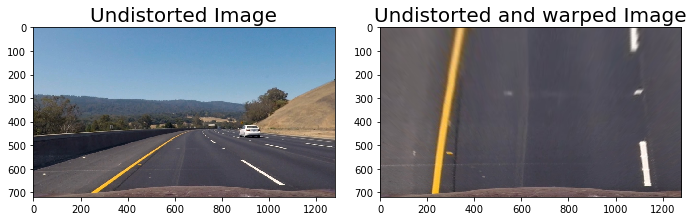

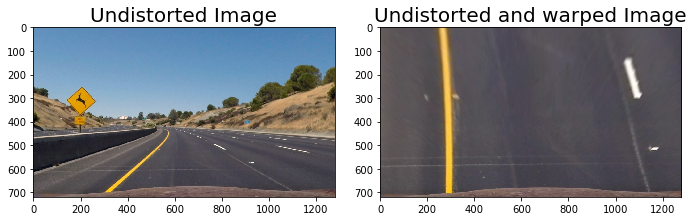

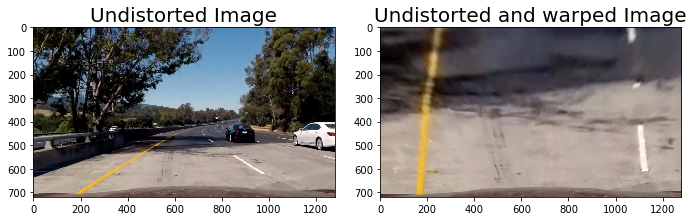

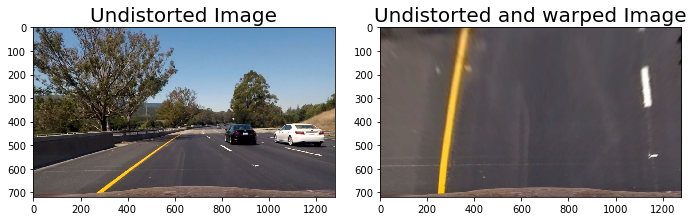

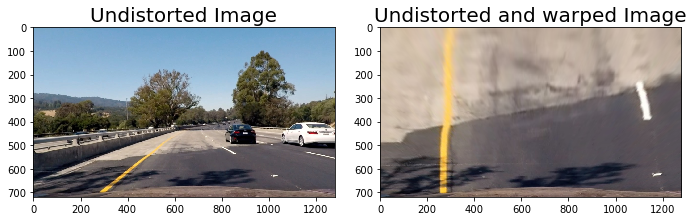

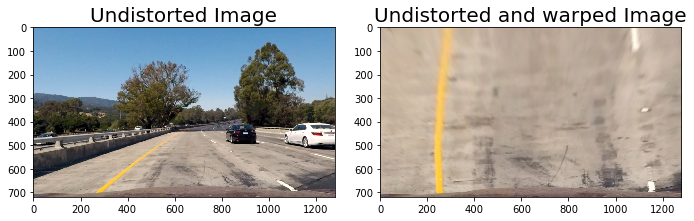

In [7]:
for image in glob.glob('test_images/test*.jpg'):
    birds_eye(image)imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
def hls_color_thresh(img,threshLow,threshHigh):
    # covert to HLS color space
    imgHLS = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    binary_output = np.zeros((img.shape[0],img.shape[1]))
    binary_output[(imgHLS[:,:,0] >= threshLow[0]) & (imgHLS[:,:,0] <= threshHigh[0]) & (imgHLS[:,:,1] >= threshLow[1])  & (imgHLS[:,:,1] <= threshHigh[1])  & (imgHLS[:,:,2] >= threshLow[2]) & (imgHLS[:,:,2] <= threshHigh[2])] = 1
    return binary_output

In [30]:
def apply_thresholds(image,show = True):
    img, M = birds_eye(image,display = False)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgHLS = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)
    yellow_low = np.array([0,100,100])
    yellow_high = np.array([50,255,255])
    yellow_binary = np.zeros((img.shape[0],img.shape[1]))
    yellow_binary[(imgHLS[:,:,0] >= yellow_low[0]) & (imgHLS[:,:,0] <= yellow_high[0]) & (imgHLS[:,:,1] >= yellow_low[1])  & (imgHLS[:,:,1] <= yellow_high[1])  & (imgHLS[:,:,2] >= yellow_low[2]) & (imgHLS[:,:,2] <= yellow_high[2])] = 1

    white_low = np.array([18,0,180])
    white_high = np.array([255,80,255])
    
    white_binary = np.zeros((img.shape[0],img.shape[1]))
    white_binary[(imgHLS[:,:,0] >= white_low[0]) & (imgHLS[:,:,0] <= white_high[0]) & (imgHLS[:,:,1] >= white_low[1])  & (imgHLS[:,:,1] <= white_high[1])  & (imgHLS[:,:,2] >= white_low[2]) & (imgHLS[:,:,2] <= white_high[2])] = 1

    imgThres_both =np.zeros_like(yellow_binary)

    imgThres_both[(yellow_binary==1) | (white_binary==1)] =1
    #Threshold color channel
 
    if show == True:
        f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey='col', sharex='row', figsize=(10,6))
        f.tight_layout()
        
        
        ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype('uint8'))
        ax1.set_title('warped Image',fontsize=10)
        
        ax2.set_title('yellow binary threshold', fontsize=16)
        ax2.imshow(yellow_binary, cmap='gray')
        
        ax3.set_title('white binary threshold', fontsize=16)
        ax3.imshow(white_binary, cmap='gray')
        
        ax4.set_title('combined binary threshold', fontsize=16)
        ax4.imshow(imgThres_both, cmap='gray')
        

    else:
        return combined_binary
        

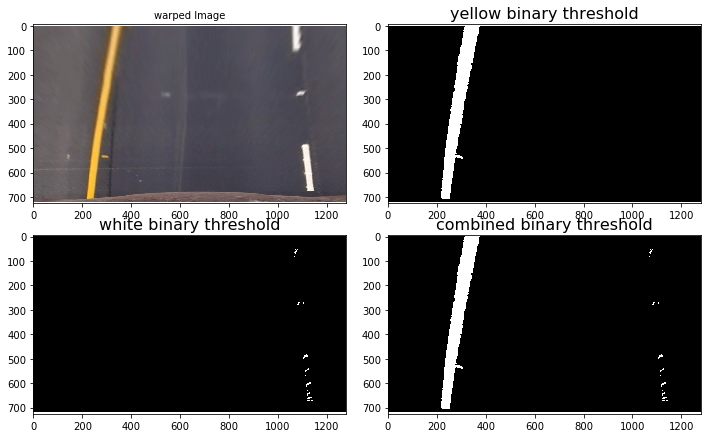

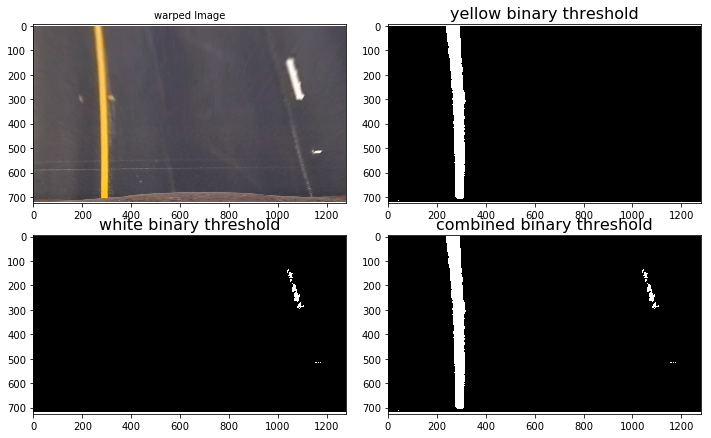

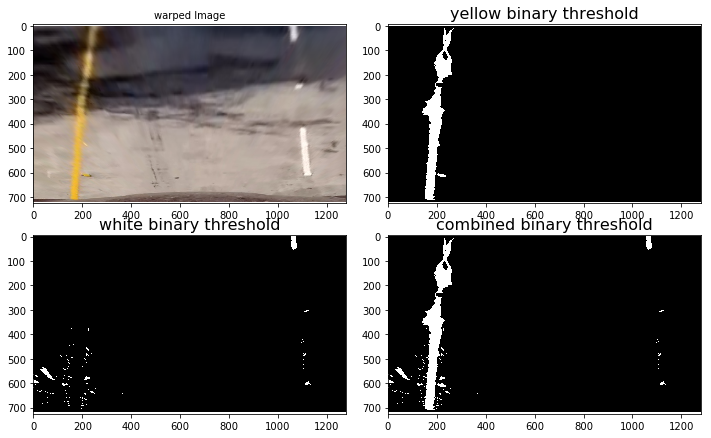

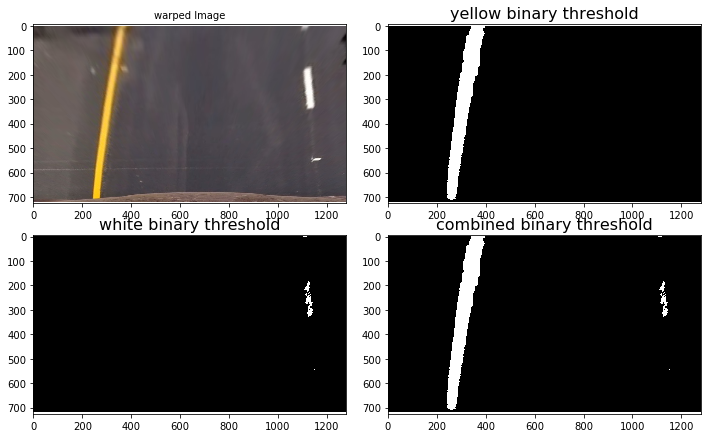

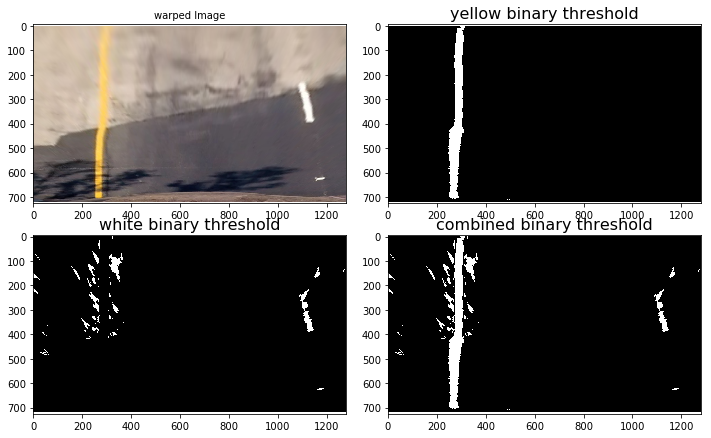

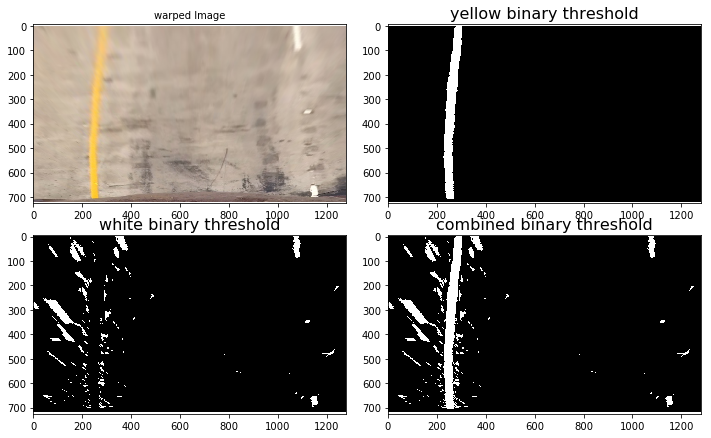

In [31]:
for image in glob.glob('test_images/test*.jpg'):
    apply_thresholds(image)

In [32]:
def sobel_x(img,sobel_kernel = 3,min_thres = 20, max_thres = 100):
    imghsl = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    #channels L and S from HLS
    sobelx1 = cv2.Sobel(imghsl[:,:,1],cv2.CV_64F,1,0)
    sobelx2 = cv2.Sobel(imghsl[:,:,2],cv2.CV_64F,1,0)
    #Scale to 8-bit and convert to type = np.uint8
    scaled_sobelx1 = np.uint8(255*sobelx1/np.max(sobelx1))
    scaled_sobelx2 = np.uint8(255*sobelx2/np.max(sobelx2))
    
    #Create a binary mask where mag thresholds are met
    binary_outputx1 = np.zeros_like(scaled_sobelx1)
    binary_outputx1[(scaled_sobelx1>=min_thres)&(scaled_sobelx1<=max_thres)] = 1

    binary_outputx2 = np.zeros_like(scaled_sobelx2)
    binary_outputx2[(scaled_sobelx2>=min_thres)&(scaled_sobelx2<=max_thres)] = 1
    
    binary_output = np.zeros_like(scaled_sobelx1)
    binary_output[(binary_outputx1 ==1)|(binary_outputx2 ==1)] = 1
    
    return binary_output

In [33]:
def mag_thresh(img,sobel_kernel = 3,mag_thresh =(0,255)):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1)
    #calculate the magnitude
    magnit = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*magnit/np.max(magnit))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>=mag_thresh[0])&(scaled_sobel<=mag_thresh[1])] = 1
    return binary_output

In [34]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=sobel_kernel)

    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)

    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    absgraddir = np.arctan2(abs_sobely, abs_sobelx) 

    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output

In [35]:
def mag_dir_thresh(img, sobel_kernel=3, mag_thresh=(0, 255), dir_thresh=(0,np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize=sobel_kernel) 
    sobely = cv2.Sobel(img, cv2.CV_64F, 0,1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    
    #Calc angle
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    absgraddir = np.arctan2(abs_sobely, abs_sobelx) 

    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*gradmag / np.max(gradmag))
       
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1]) & (absgraddir >= dir_thresh[0]) & (absgraddir <= dir_thresh[1]) ] = 1


    # 6) Return this mask as your binary_output image
    return binary_output


In [38]:
def plt_sobel(img,show=True,read=True):
    if read:
        img = cv2.imread(image)
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        magThr =mag_thresh(imgRGB, 3, (50, 100))
        dirThr =dir_threshold(imgRGB, 9,(np.pi/240/90, np.pi/2*60/90))
        imgThr = sobel_x(imgRGB,9,80,220) #Sobel x
    if show == True:
        f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey='col', sharex='row', figsize=(10,6))
        f.tight_layout()
          
        ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype('uint8'))
        ax1.set_title('original Image',fontsize=16)
        
        ax2.set_title('Magnitude threshold Image', fontsize=16)
        ax2.imshow(magThr, cmap='gray')
        
        ax3.set_title('Direction threshold Image', fontsize=16)
        ax3.imshow(dirThr, cmap='gray')
        
        ax4.set_title('Sobel x only threshold Image', fontsize=16)
        ax4.imshow(imgThr, cmap='gray')


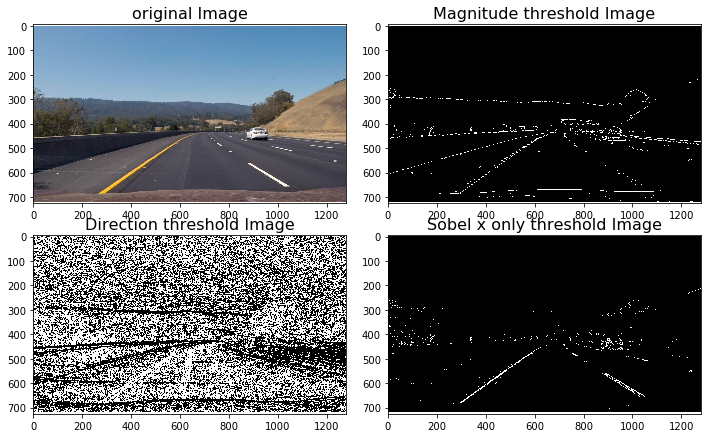

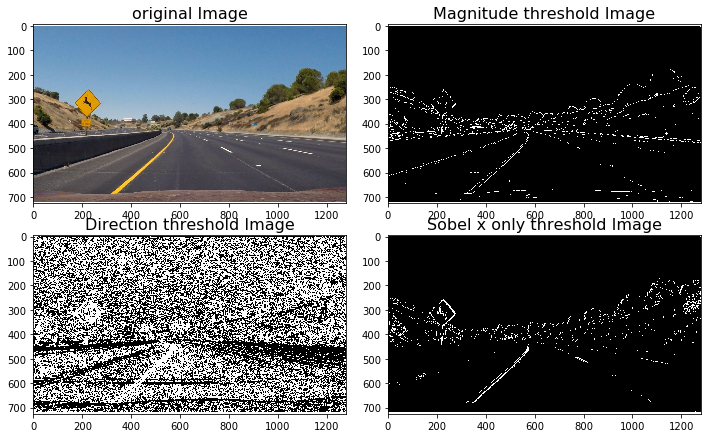

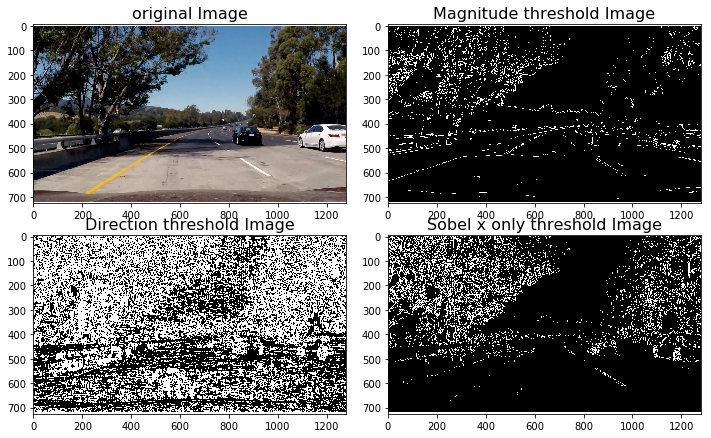

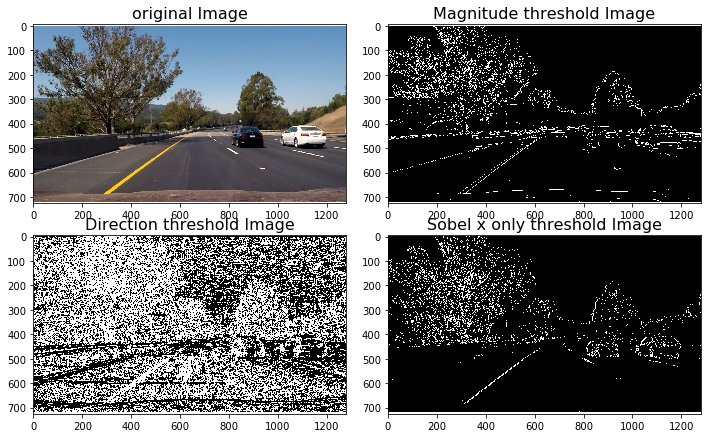

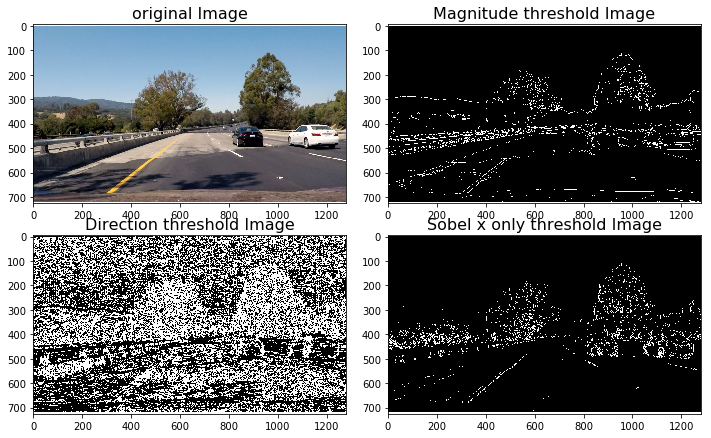

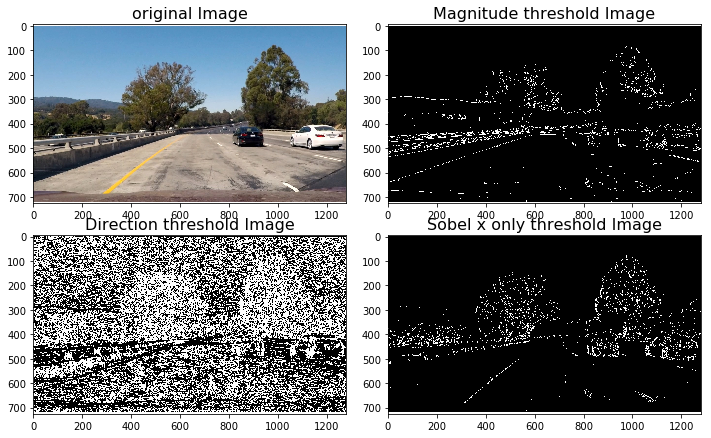

In [39]:
images = glob.glob('test_images/test*.jpg')
for image in images:
    plt_sobel(image)

In [50]:
img = cv2.imread("camera_cal/calibration2.jpg")
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
src = np.float32([[490, 482],[810, 482],
                    [1250, 720],[0, 720]])
dst = np.float32([[0, 0], [1280, 0], 
                    [1250, 720],[40, 720]])
imgThr = sobel_x(imgRGB,9,80,220) #Sobel x
M_persp = cv2.getPerspectiveTransform(src, dst)
Minv_persp = cv2.getPerspectiveTransform(dst, src)

img_size = (imgThr.shape[1], imgThr.shape[0])
binary_warped = cv2.warpPerspective(imgThr, M_persp, img_size, flags=cv2.INTER_LINEAR)

#Return camera calibration (arrays ret, mtx, dist, rvecs, tvecs )

In [51]:
def fitlines(binary_warped):
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    out_img = np.dstack((binary_warped,binary_warped,binary_warped))*255

    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:])+midpoint

    nwindows = 9
    window_height = np.int(binary_warped.shape[0]/nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    leftx_current = leftx_base
    rightx_current = rightx_base

    margin = 100
    minpix = 50

    left_lane_inds = []
    right_lane_inds = []

    for window in range(nwindows):
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
    
    
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
    #good_left_inds = ((nonzeroy>=win_y_low)　& (nonzeroy < win_y_high) & (nonzerox>=win_xleft_low)&(nonzerox<win_xleft_high)).nonzero()[0]
    #good_right_inds = ((nonzeroy>=win_y_low)　& (nonzeroy < win_y_high) & (nonzerox>=win_xright_low)&(nonzerox<win_xright_high)).nonzero([0])
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
    
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
        
    #concatenate the arrays
    
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    if len(leftx)==0:
        left_fit = []
    else:
        left_fit = np.polyfit(lefty,leftx,2)
    if len(rightx)==0:
        right_fit = []
    else:
        right_fit = np.polyfit(righty,rightx,2)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    return left_fit, right_fit, out_img

(720, 1280, 3)
255.0
ok


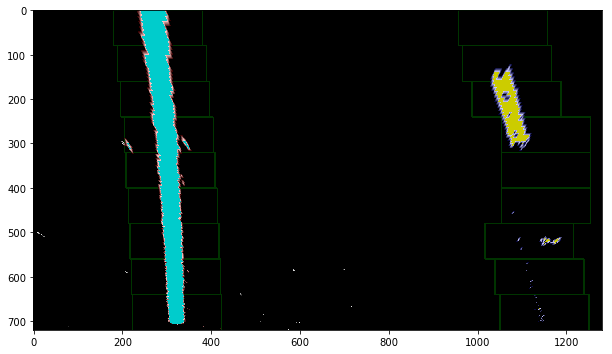

In [68]:
#Visualization of lines fitted
img = cv2.imread("test_images/test2.jpg")
#img = cv2.imread("test_images/straight_lines2.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_undist = cv2.undistort(imgRGB, mtx, dist, None, mtx)

#2.Magnitude Threshold
#Threshold color    
yellow_low = np.array([0,100,100])
yellow_high = np.array([50,255,255])
white_low = np.array([18,0,180])
white_high = np.array([255,80,255])
global ref_left 
global ref_right
global left_fit
global right_fit

imgThres_yellow = hls_color_thresh(img_undist,yellow_low,yellow_high)
imgThres_white = hls_color_thresh(img_undist,white_low,white_high)
imgThr_sobelx = sobel_x(img_undist,9,80,220) #Sobel x

img_mag_thr =np.zeros_like(imgThres_yellow)
#imgThresColor[(imgThres_yellow==1) | (imgThres_white==1)] =1
img_mag_thr[(imgThres_yellow==1) | (imgThres_white==1) | (imgThr_sobelx==1)] =1
img_mag_thr[(imgThres_yellow==1) | (imgThres_white==1)] =1


#3. Birds-eye
#Perspective array pre-calculated
img_size = (img_mag_thr.shape[1], img_mag_thr.shape[0])
binary_warped = cv2.warpPerspective(img_mag_thr, M_persp, img_size, flags=cv2.INTER_LINEAR)

left_fit, right_fit,out_img = fitlines(binary_warped)


print(out_img.shape)
print(np.max(out_img))


ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    

plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
plt.imshow(binary_warped, cmap='gray')

plt.subplot(2,1,2)

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

plt.subplot(3,1,2)
binary_warped2 = np.zeros((720, 1280,3))
binary_warped2[:,:,0] = binary_warped
binary_warped2[:,:,1] = binary_warped
binary_warped2[:,:,2] = binary_warped
plt.imshow(out_img)
result = cv2.addWeighted(binary_warped2, .8, out_img, .8, 0)
plt.imshow(result)
print("ok")

In [54]:

def fit_continuous(left_fit, right_fit, binary_warped):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # Fit a second order polynomial to each
    if len(leftx) == 0:
        left_fit_updated =[]
    else:
        left_fit_updated = np.polyfit(lefty, leftx, 2)
    
    
    if len(rightx) == 0:
        right_fit_updated =[]
    else:
        right_fit_updated = np.polyfit(righty, rightx, 2)
        
    return  left_fit_updated, right_fit_updated


In [55]:
def curvature(left_fit,right_fit,binary_warped):
    ploty = np.linspace(0,binary_warped.shape[0]-1,binary_warped.shape[0])
    y_eval = np.max(ploty)
    
# Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension


# Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    center = (((left_fit[0]*720**2+left_fit[1]*720+left_fit[2]) +(right_fit[0]*720**2+right_fit[1]*720+right_fit[2])) /2 -640)*xm_per_pix
    return left_curverad, right_curverad, center


In [56]:
def drawLine(undist,warped,left_fit,right_fit):
    #Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    ploty = np.linspace(0,binary_warped.shape[0]-1,binary_warped.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
 
    
    pts_left = np.array([np.flipud(np.transpose(np.vstack([left_fitx, ploty])))])
    pts_right = np.array([np.transpose(np.vstack([right_fitx, ploty]))])
    pts = np.hstack((pts_left, pts_right))
    
    cv2.polylines(color_warp, np.int_([pts]), isClosed=False, color=(0,0,255), thickness = 40)
    cv2.fillPoly(color_warp, np.int_(pts), (0,255,0))
    #Warp the blank back to original image space 
    newwarp = cv2.warpPerspective(color_warp, Minv_persp,  img_size, flags=cv2.INTER_LINEAR)
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    return(result, color_warp)
 

In [57]:
def sanity_check(left_fit, right_fit, minSlope, maxSlope):
    #Performs a sanity check on the lanes
    #Check 1: check if left and right fits exists
    #Check 2: Calculates the tangent between left and right in two points, and check if it is in a reasonable threshold
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    if len(left_fit) ==0 or len(right_fit) == 0:
        status = False
        d0=0
        d1=0
        #Previous fitlines routine returns empty list to them if not finds
    else:
        #Difference of slope
        L_0 = 2*left_fit[0]*460+left_fit[1]
        R_0 = 2*right_fit[0]*460+right_fit[1]
        d0 =  np.abs(L_0-R_0)

        L_1 = 2*left_fit[0]*720+left_fit[1]
        R_1 = 2*right_fit[0]*720+right_fit[1]
        d1 =  np.abs(L_1-R_1)

        
        if d0>= minSlope and d0<= maxSlope and d1>= minSlope and d1<= maxSlope:
            status = True
        else:
            status = False
            
    return(status, d0, d1)
        

In [63]:
#Function to process the image
global counter
counter=0
ref_left =np.array([-0.0001,0,400])
ref_right=np.array([-0.0001,0,1000])   
left_fit =np.array([-0.0001,0,400])
right_fit=np.array([-0.0001,0,1000])   



def process_image(image):
    #1. Camera correction
    #Calibration arrays pre-calculated
    img_undist = cv2.undistort(image, mtx, dist, None, mtx)
    global counter
    
    #2.Magnitude Threshold
    #Threshold color    
    yellow_low = np.array([0,100,100])
    yellow_high = np.array([50,255,255])
    white_low = np.array([18,0,180])
    white_high = np.array([255,80,255])
    global ref_left 
    global ref_right
    global left_fit
    global right_fit

    imgThres_yellow = hls_color_thresh(img_undist,yellow_low,yellow_high)
    imgThres_white = hls_color_thresh(img_undist,white_low,white_high)
    imgThr_sobelx = sobel_x(img_undist,9,80,220) #Sobel x

    img_mag_thr =np.zeros_like(imgThres_yellow)
    #imgThresColor[(imgThres_yellow==1) | (imgThres_white==1)] =1
    img_mag_thr[(imgThres_yellow==1) | (imgThres_white==1) | (imgThr_sobelx==1)] =1
        
    #3. Birds-eye
    #Perspective array pre-calculated
    img_size = (img_mag_thr.shape[1], img_mag_thr.shape[0])
    binary_warped = cv2.warpPerspective(img_mag_thr, M_persp, img_size, flags=cv2.INTER_LINEAR)
    
    #4. Detect lanes and return fit curves
    
    if counter==0:
        left_fit, right_fit,out_imgfit = fitlines(binary_warped)
    else:
        left_fit, right_fit = fit_continuous(left_fit, right_fit, binary_warped)
    
    
    #Project video (2.8, 3.5)
    status_sanity, d0, d1 =sanity_check(left_fit, right_fit, 0, .55)
    #Challenge video (2.4,3.1)
    #status_sanity, d0, d1, d2 =sanity_check(left_fit, right_fit, 2.4,3.1)
    
    #print(left_fit)
    #print(right_fit)
    
    #Calc curvature and center
    if status_sanity  == True:        
        #Save as last reliable fit
        ref_left, ref_right = left_fit, right_fit        
        counter+=1
    else:        #Use the last realible fit
        left_fit, right_fit = ref_left, ref_right
        
    left_curv, right_curv, center_off = curvature(left_fit, right_fit, binary_warped)

    #Warp back to original and merge with image    
    img_merge, img_birds = drawLine(img_undist, binary_warped,left_fit, right_fit)

    #Composition of images to final display
    img_out=np.zeros((576,1280,3), dtype=np.uint8)

    img_out =cv2.resize(img_merge,(1280,576))

    
    
    #Write curvature and center in image
    TextL = "Left curv: " + str(int(left_curv)) + " m"
    TextR = "Right curv: " + str(int(right_curv))+ " m"
    TextC = "Center offset: " + str(round( center_off,2)) + "m"
    #TextAux = str(status_sanity) + ", d0: " + str(round(d0,2)) + ", d1: " + str(round(d1,2))
    fontScale=1
    thickness=2
    
    fontFace = cv2.FONT_HERSHEY_SIMPLEX


    cv2.putText(img_out, TextL, (130,40), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    cv2.putText(img_out, TextR, (130,70), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    cv2.putText(img_out, TextC, (130,100), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    #cv2.putText(img_out, TextAux, (100,130), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    
    #return img_out, binary_warped, left_curv, right_curv, left_fit, right_fit   
    return img_out 

In [64]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import moviepy as mve

In [65]:
#Create video file pipeline
counter=0
output = 'out_test_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
#clip1 = VideoFileClip("project_video.mp4").subclip(22,25)
#clip1 = VideoFileClip("challenge_video.mp4")
#clip1 = VideoFileClip("challenge_video.mp4")

#clip1.save_frame("frame.jpeg")
#clip1 = clip1.fx(mve.vfx.rotate, lambda t: 90*t, expand=False)
out_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time out_clip.write_videofile(output, audio=False)
print(counter)

[MoviePy] >>>> Building video out_test_video.mp4
[MoviePy] Writing video out_test_video.mp4


100%|█████████▉| 1260/1261 [03:50<00:00,  5.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: out_test_video.mp4 

CPU times: user 17min 32s, sys: 1.46 s, total: 17min 33s
Wall time: 3min 51s
1255


In [66]:
HTML("""
<video  width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))

In [67]:
#Create video file pipeline
counter=0
output = 'harder_challenge_result.mp4'
clip1 = VideoFileClip("harder_challenge_video.mp4")
#clip1 = VideoFileClip("project_video.mp4").subclip(22,25)
#clip1 = VideoFileClip("challenge_video.mp4")
#clip1 = VideoFileClip("challenge_video.mp4")

#clip1.save_frame("frame.jpeg")
#clip1 = clip1.fx(mve.vfx.rotate, lambda t: 90*t, expand=False)
out_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time out_clip.write_videofile(output, audio=False)
print(counter)

[MoviePy] >>>> Building video harder_challenge_result.mp4
[MoviePy] Writing video harder_challenge_result.mp4


100%|█████████▉| 1199/1200 [03:55<00:00,  7.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harder_challenge_result.mp4 

CPU times: user 16min 57s, sys: 1.8 s, total: 16min 59s
Wall time: 3min 56s
496


In [69]:
HTML("""
<video  width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))

In [70]:
#Create video file pipeline
counter=0
output = '1challenge_result.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
#clip1 = VideoFileClip("project_video.mp4").subclip(22,25)
#clip1 = VideoFileClip("challenge_video.mp4")
#clip1 = VideoFileClip("challenge_video.mp4")

#clip1.save_frame("frame.jpeg")
#clip1 = clip1.fx(mve.vfx.rotate, lambda t: 90*t, expand=False)
out_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time out_clip.write_videofile(output, audio=False)
print(counter)

[MoviePy] >>>> Building video 1challenge_result.mp4
[MoviePy] Writing video 1challenge_result.mp4


100%|██████████| 485/485 [00:52<00:00,  7.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: 1challenge_result.mp4 

CPU times: user 4min 21s, sys: 1.06 s, total: 4min 22s
Wall time: 52.4 s
370


In [71]:
HTML("""
<video  width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))